In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn import linear_model

In [3]:
train = pd.read_csv('/content/sample_data/train.csv')
test = pd.read_csv('/content/sample_data/test.csv')

In [4]:
print("Train dataset shape:",train.shape)
print("Test dataset shape:",test.shape)

Train dataset shape: (1460, 81)
Test dataset shape: (1459, 80)


In [5]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
print(train.SalePrice.describe())

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


Skew: 1.8828757597682129


<function matplotlib.pyplot.show>

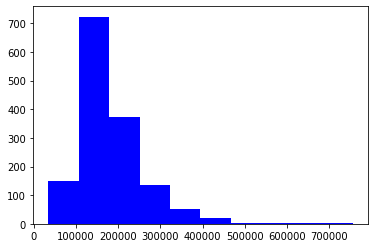

In [7]:
print("Skew:",train.SalePrice.skew())
plt.hist(train.SalePrice, color='blue')
plt.show

0.12133506220520406


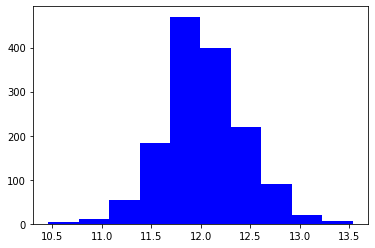

In [8]:
target = np.log(train.SalePrice)
print(target.skew())
plt.hist(target,color='blue')
plt.show()

In [9]:
numeric_features = train.select_dtypes(include=[np.number])
print(numeric_features.dtypes)

Id                 int64
MSSubClass         int64
LotFrontage      float64
LotArea            int64
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
MasVnrArea       float64
BsmtFinSF1         int64
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
1stFlrSF           int64
2ndFlrSF           int64
LowQualFinSF       int64
GrLivArea          int64
BsmtFullBath       int64
BsmtHalfBath       int64
FullBath           int64
HalfBath           int64
BedroomAbvGr       int64
KitchenAbvGr       int64
TotRmsAbvGrd       int64
Fireplaces         int64
GarageYrBlt      float64
GarageCars         int64
GarageArea         int64
WoodDeckSF         int64
OpenPorchSF        int64
EnclosedPorch      int64
3SsnPorch          int64
ScreenPorch        int64
PoolArea           int64
MiscVal            int64
MoSold             int64
YrSold             int64
SalePrice          int64
dtype: object


In [10]:
corr = numeric_features.corr()

In [11]:
print(corr['SalePrice'].sort_values(ascending=False)[:5],'\n')
print(corr['SalePrice'].sort_values(ascending=False)[-5:])

SalePrice      1.000000
OverallQual    0.790982
GrLivArea      0.708624
GarageCars     0.640409
GarageArea     0.623431
Name: SalePrice, dtype: float64 

YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64


In [12]:
print(train.OverallQual.unique())

[ 7  6  8  5  9  4 10  3  1  2]


In [13]:
quality_pivot = train.pivot_table(index='OverallQual',values='SalePrice',aggfunc=np.median)
print(quality_pivot)

             SalePrice
OverallQual           
1                50150
2                60000
3                86250
4               108000
5               133000
6               160000
7               200141
8               269750
9               345000
10              432390


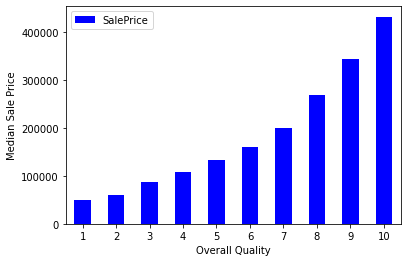

In [14]:
quality_pivot.plot(kind='bar',color='blue')
plt.xlabel('Overall Quality')
plt.ylabel('Median Sale Price')
plt.xticks(rotation=0)
plt.show()

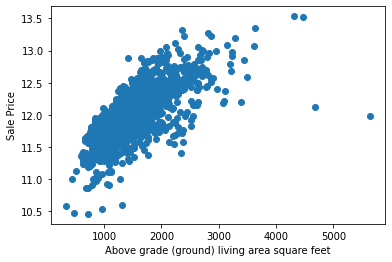

In [15]:
plt.scatter(x=train['GrLivArea'],y=target)
plt.ylabel('Sale Price')
plt.xlabel('Above grade (ground) living area square feet')
plt.show()

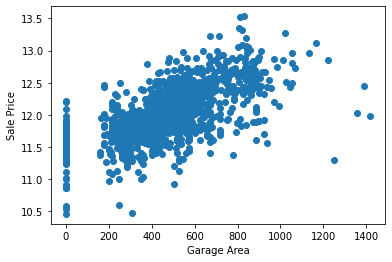

In [16]:
plt.scatter(x=train['GarageArea'],y=target)
plt.ylabel('Sale Price')
plt.xlabel('Garage Area')
plt.show()

In [17]:
train = train[train['GarageArea'] < 1200]

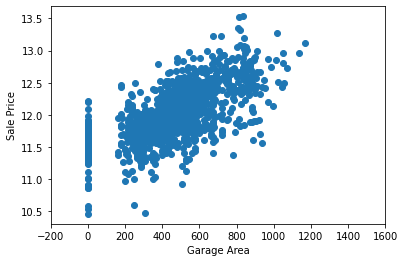

In [18]:
plt.scatter(x=train['GarageArea'],y=np.log(train.SalePrice))
plt.xlim(-200,1600)
plt.ylabel('Sale Price')
plt.xlabel('Garage Area')
plt.show()

In [19]:
nulls = pd.DataFrame(train.isnull().sum().sort_values(ascending=False)[:25])
nulls.columns = ['Null Count']
nulls.index.name = 'Feature'
print(nulls)

              Null Count
Feature                 
PoolQC              1449
MiscFeature         1402
Alley               1364
Fence               1174
FireplaceQu          689
LotFrontage          258
GarageCond            81
GarageType            81
GarageYrBlt           81
GarageFinish          81
GarageQual            81
BsmtExposure          38
BsmtFinType2          38
BsmtFinType1          37
BsmtCond              37
BsmtQual              37
MasVnrArea             8
MasVnrType             8
Electrical             1
Utilities              0
YearRemodAdd           0
MSSubClass             0
Foundation             0
ExterCond              0
ExterQual              0


In [20]:
print("unique values are:",train.MiscFeature.unique())

unique values are: [nan 'Shed' 'Gar2' 'Othr' 'TenC']


In [21]:
categoricals = train.select_dtypes(exclude=[np.number])
print(categoricals.describe())

       MSZoning Street Alley LotShape LandContour Utilities LotConfig  \
count      1455   1455    91     1455        1455      1455      1455   
unique        5      2     2        4           4         2         5   
top          RL   Pave  Grvl      Reg         Lvl    AllPub    Inside   
freq       1147   1450    50      921        1309      1454      1048   

       LandSlope Neighborhood Condition1  ... GarageType GarageFinish  \
count       1455         1455       1455  ...       1374         1374   
unique         3           25          9  ...          6            3   
top          Gtl        NAmes       Norm  ...     Attchd          Unf   
freq        1378          225       1257  ...        867          605   

       GarageQual GarageCond PavedDrive PoolQC  Fence MiscFeature SaleType  \
count        1374       1374       1455      6    281          53     1455   
unique          5          5          3      3      4           4        9   
top            TA         TA      

In [22]:
print(train.Street.value_counts(),"\n")

Pave    1450
Grvl       5
Name: Street, dtype: int64 



In [23]:
train['enc_street'] = pd.get_dummies(train.Street,drop_first=True)
test['enc_street'] = pd.get_dummies(test.Street,drop_first=True)

In [24]:
print(train.enc_street.value_counts(),"\n")

1    1450
0       5
Name: enc_street, dtype: int64 



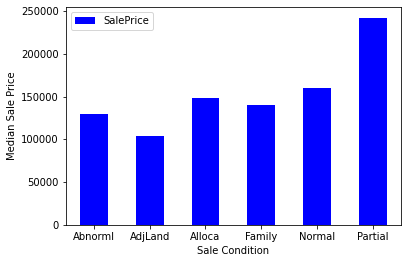

In [25]:
condition_pivot = train.pivot_table(index='SaleCondition', values='SalePrice', aggfunc=np.median)
condition_pivot.plot(kind='bar', color='blue')
plt.xlabel('Sale Condition')
plt.ylabel('Median Sale Price')
plt.xticks(rotation=0)
plt.show()

In [26]:
def encode(x): return 1 if x == 'Partial' else 0
train['enc_condition'] = train.SaleCondition.apply(encode)
test['enc_condition'] = test.SaleCondition.apply(encode)

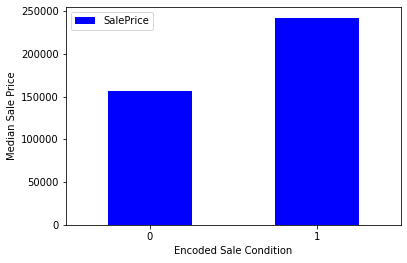

In [27]:
condition_pivot = train.pivot_table(index='enc_condition', values='SalePrice', aggfunc=np.median)
condition_pivot.plot(kind='bar', color='blue')
plt.xlabel('Encoded Sale Condition')
plt.ylabel('Median Sale Price')
plt.xticks(rotation=0)
plt.show()

In [28]:
data = train.select_dtypes(include=[np.number]).interpolate().dropna()

In [29]:
print(sum(data.isnull().sum() != 0))

0


In [30]:
y = np.log(train.SalePrice)
x = data.drop(['SalePrice','Id'],axis=1)

In [31]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=.33)

In [32]:
!pip install lazypredict

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [33]:
from lazypredict.Supervised import LazyRegressor
clf = LazyRegressor(verbose=0)
models,predictions = clf.fit(x_train, x_test, y_train, y_test)
models

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.utils.testing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.utils. Anything that cannot be imported from sklearn.utils is now part of the private API.
  warnings.warn(message, FutureWarning)
100%|██████████| 42/42 [00:16<00:00,  2.51it/s]


,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
GradientBoostingRegressor,0.89,0.90,0.13,0.52
HuberRegressor,0.88,0.89,0.13,0.10
LassoLarsCV,0.88,0.89,0.13,0.18
ElasticNetCV,0.88,0.89,0.13,0.58
LassoCV,0.88,0.89,0.13,0.28
BayesianRidge,0.88,0.89,0.13,0.06
LGBMRegressor,0.88,0.89,0.13,1.10
PoissonRegressor,0.88,0.89,0.13,0.08
RidgeCV,0.88,0.89,0.13,0.03


In [34]:
# from sklearn.ensemble import ExtraTreesRegressor
# reg = ExtraTreesRegressor(n_estimators=1000, random_state=43).fit(x_train, y_train)
# reg.score(x_test, y_test)

In [35]:
from sklearn.ensemble import GradientBoostingRegressor
reg = GradientBoostingRegressor(random_state=0,n_estimators=90,max_depth=3)
reg.fit(x_train, y_train)
reg.score(x_test,y_test)

0.9019004752616839

In [36]:
#lr = linear_model.LinearRegression()

In [37]:
#model = lr.fit(x_train,y_train)

In [38]:
print("R^2 is: \n",reg.score(x_test,y_test))
predictions = reg.predict(x_test)

R^2 is: 
 0.9019004752616839


In [39]:
print('RMSE :', mean_squared_error(y_test,predictions))

RMSE : 0.015662072938995047


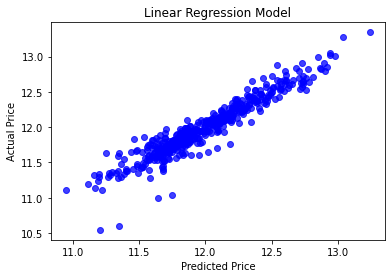

In [40]:
actual_values = y_test
plt.scatter(predictions,actual_values,alpha=0.75,color='b')
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title('Linear Regression Model')
plt.show()

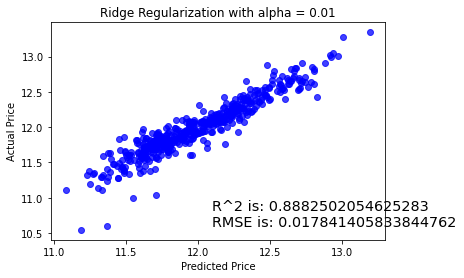

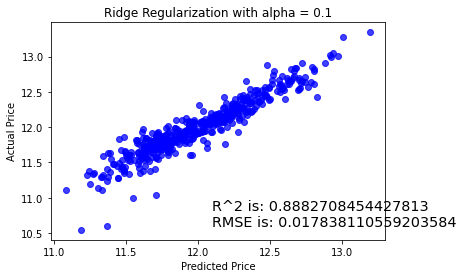

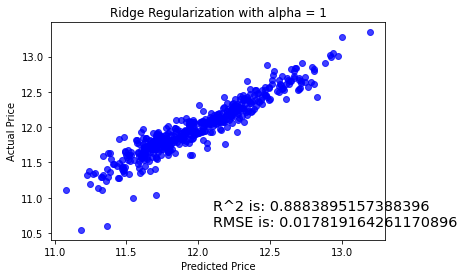

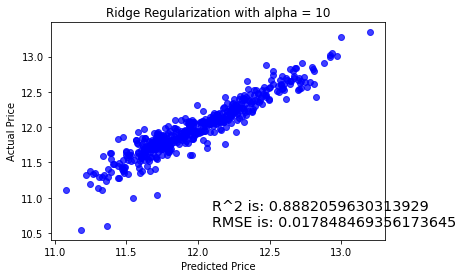

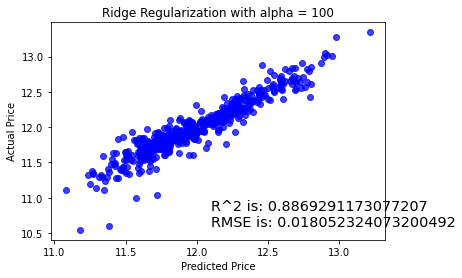

In [41]:
for i in range (-2, 3):
    alpha = 10**i
    rm = linear_model.Ridge(alpha=alpha)
    ridge_model = rm.fit(x_train, y_train)
    preds_ridge = ridge_model.predict(x_test)

    plt.scatter(preds_ridge, actual_values, alpha=.75, color='b')
    plt.xlabel('Predicted Price')
    plt.ylabel('Actual Price')
    plt.title('Ridge Regularization with alpha = {}'.format(alpha))
    overlay = 'R^2 is: {}\nRMSE is: {}'.format(
                    ridge_model.score(x_test, y_test),
                    mean_squared_error(y_test, preds_ridge))
    plt.annotate(s=overlay,xy=(12.1,10.6),size='x-large')
    plt.show()

In [42]:
print("R^2 is: \n", reg.score(x_test, y_test))

R^2 is: 
 0.9019004752616839


In [43]:
submission = pd.DataFrame()

In [44]:
submission['Id'] = test.Id

In [45]:
feats = test.select_dtypes(include = [np.number]).drop(['Id'], axis=1).interpolate()

In [46]:
predictions = reg.predict(feats)

In [47]:
final_predictions = np.exp(predictions)

In [48]:
print("Original predictions are: \n", predictions[:10], "\n")
print("Final predictions are: \n", final_predictions[:10])

Original predictions are: 
 [11.7931942  12.01496575 12.1489003  12.11993197 12.15632598 12.09637187
 12.06406356 12.0161727  12.07222387 11.67346225] 

Final predictions are: 
 [132348.54265627 165208.85692767 188886.25715711 183493.0308956
 190294.08611039 179220.44614551 173522.67537526 165408.37541598
 174944.46655334 117414.09578792]


In [49]:
submission['SalePrice'] = final_predictions

In [50]:
print(submission.head())

     Id  SalePrice
0  1461  132348.54
1  1462  165208.86
2  1463  188886.26
3  1464  183493.03
4  1465  190294.09


In [51]:
submission.to_csv('submission4.csv',index=False)